C:\Users\Ezgi\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:318: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
C:\Users\Ezgi\AppData\Local\Temp\ipykernel_1588\47077458.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y_semi == -1, 0], X[y_semi == -1, 1], c='green', edgecolor='k', marker='x', s=150, label='Unlabeled')


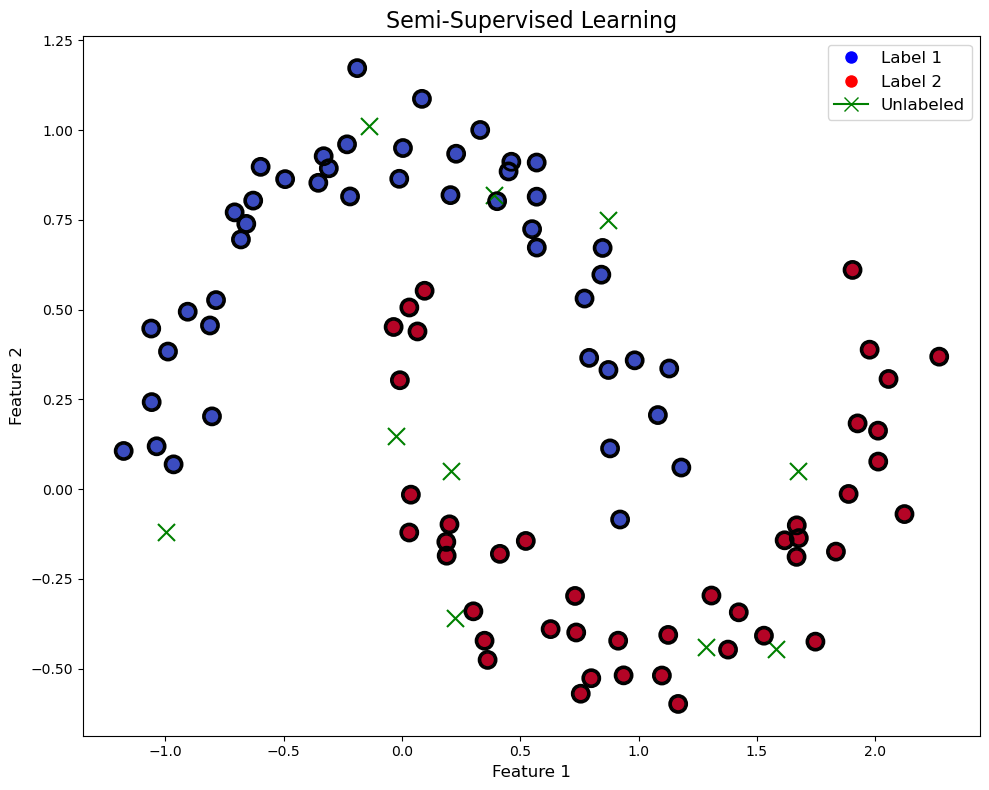

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.semi_supervised import LabelSpreading

# Generate a more complex synthetic dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# For semi-supervised learning, mark some data points as unlabeled
y_semi = np.copy(y)
y_semi[::10] = -1  # Set every 10th point as unlabeled

# Semi-Supervised Learning: Use LabelSpreading to spread labels to unlabeled points
label_spread = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.8).fit(X, y_semi)

# Plotting
plt.figure(figsize=(10, 8))

# Plot all points with their inferred labels (those that were labeled initially)
plt.scatter(X[y_semi != -1, 0], X[y_semi != -1, 1], c=label_spread.transduction_[y_semi != -1], 
            cmap='coolwarm', edgecolor='k', s=100, marker='o', label='Inferred Label')

# Highlight the originally unlabeled points
plt.scatter(X[y_semi == -1, 0], X[y_semi == -1, 1], c='green', edgecolor='k', marker='x', s=150, label='Unlabeled')

# Overlay the originally labeled points to differentiate them (hollow circles)
plt.scatter(X[y_semi != -1, 0], X[y_semi != -1, 1], edgecolor='k', s=150, facecolors='none', linewidths=2, label='Original Labeled')

# Title and labels
plt.title("Semi-Supervised Learning", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Custom Legend to label 'Label 1' (Blue), 'Label 2' (Red), and 'Unlabeled' (Green)
handles, _ = plt.gca().get_legend_handles_labels()
custom_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Label 1'),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Label 2'),
                 plt.Line2D([0], [0], marker='x', color='green', markersize=10, label='Unlabeled')]
plt.legend(handles=custom_labels, fontsize=12)

plt.tight_layout()
plt.show()
